# Importing pandas
The first step is to import the pandas library, which is essential for data manipulation and analysis in Python. Pandas provides powerful data structures like DataFrames that make it easy to work with structured data.

In [2]:
import pandas as pd

# Loading and Preparing the Dataset
The dataset is loaded from a file named 'housing.data' using the pandas `read_csv` function. Since the file does not have a header row, `header=None` is specified. The `sep="\\s+"` argument tells pandas to use any whitespace as a delimiter. After loading, the columns are named according to the dataset's features, making the data easier to interpret and work with. Finally, the first few rows of the DataFrame are displayed using `df.head()`.

In [3]:
df = pd.read_csv('data_files/housing.data', header=None, sep="\\s+")
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


# Importing visualization libraries
Seaborn and Matplotlib are imported for data visualization. Seaborn provides a high-level interface for drawing attractive statistical graphics, while Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing relationships between variables
A pairplot is created using Seaborn to visualize the relationships between selected variables in the dataset. This helps to identify patterns and correlations visually. The variables selected are 'DIS', 'INDUS', 'CRIM', 'RM', and 'MEDV'.

c:\Users\david\anaconda3\envs\ia_ptojects\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


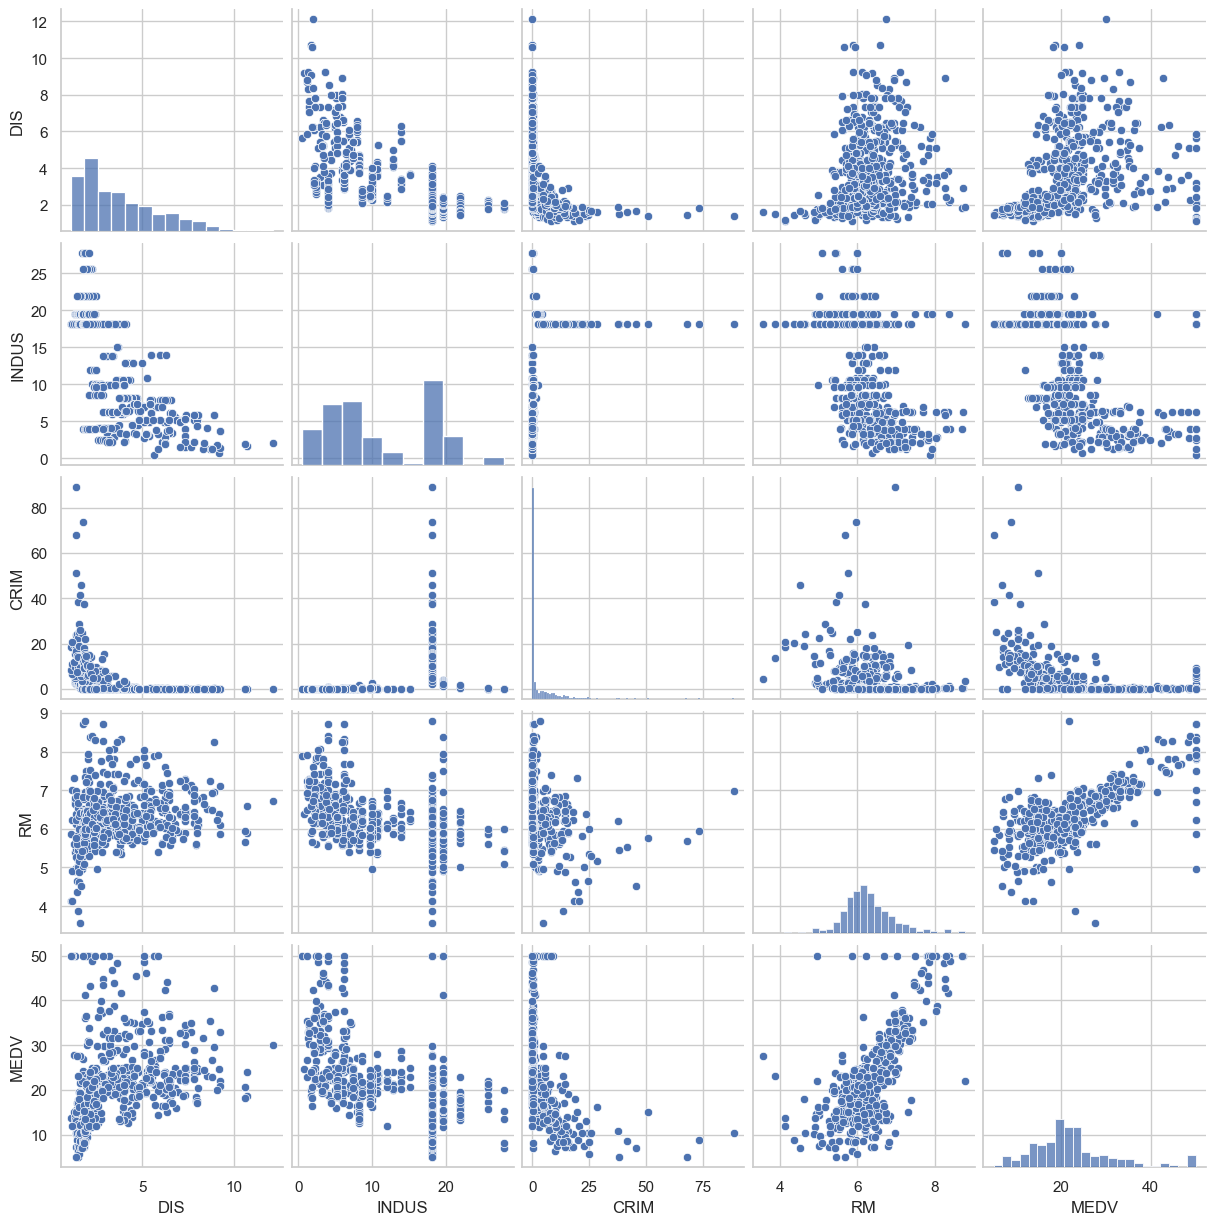

In [5]:
sns.set(style="whitegrid", context="notebook")
cols = ['DIS', "INDUS", 'CRIM','RM', 'MEDV']
sns.pairplot(df[cols], size=2.5)
plt.show()

# Correlation heatmap
A correlation matrix is computed and visualized as a heatmap. This shows the strength of relationships between the selected variables, making it easier to spot highly correlated pairs.

<Axes: >

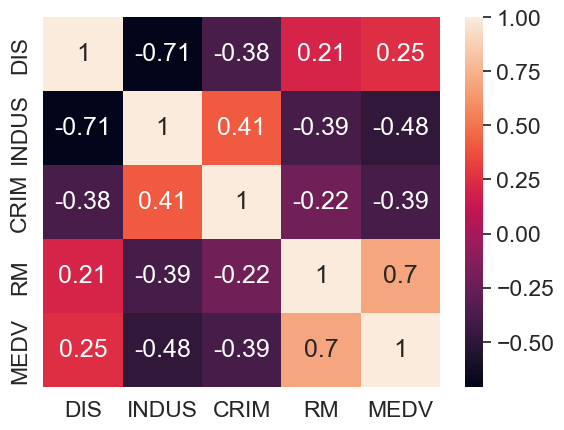

In [6]:
import numpy as np

cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
sns.heatmap(cm, cbar=True, annot=True, yticklabels=cols, xticklabels=cols)

# Linear Regression with Scikit-learn
The code imports the necessary modules for linear regression and data scaling. It selects 'RM' (average number of rooms) as the feature and 'MEDV' (median value of homes) as the target. Both are standardized before fitting a linear regression model.

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

X = df['RM'].values.reshape(-1, 1)
y = df['MEDV'].values.reshape(-1, 1)

sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)

slr = LinearRegression()
slr.fit(X_std, y_std)

LinearRegression()

# Plotting the regression line
A scatter plot of the standardized data is created, and the fitted regression line is plotted in red. This visualizes how well the linear model fits the data.

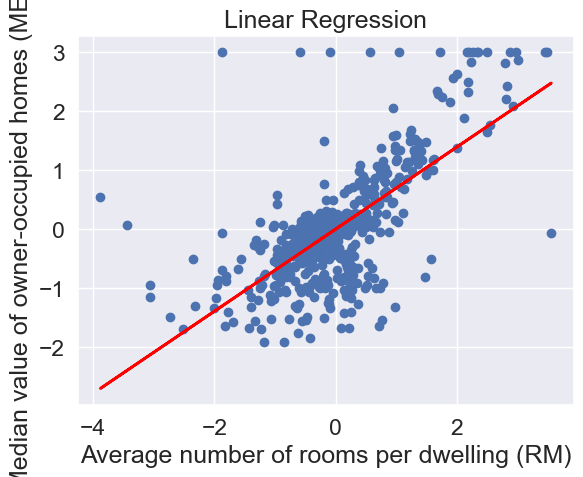

In [11]:
plt.scatter(X_std, y_std)
plt.plot(X_std, slr.predict(X_std), color='red', linewidth=2)
plt.xlabel('Average number of rooms per dwelling (RM)')
plt.ylabel('Median value of owner-occupied homes (MEDV)')
plt.title('Linear Regression')
plt.show()

# Making predictions
The model is used to predict the median value of a home given a specific number of rooms (in this case, 5). The prediction is transformed back to the original scale for interpretation.

In [13]:
num_habitaciones = 5
num_habitaciones_std = sc_x.transform(np.array([num_habitaciones]).reshape(-1, 1))
print(f'Predicción para {num_habitaciones} habitaciones: {sc_y.inverse_transform(slr.predict(num_habitaciones_std))}')

Predicción para 5 habitaciones: [[10.83992413]]
